## Scatterd interoplations

In [154]:

using ScatteredInterpolation, StaticArrays, Plots

In [155]:
# Points 
num_points = 200
xpoints = [rand() for x in 1:num_points]
min_x, max_x = extrema(xpoints)
ypoints = sort!([rand() for y in 1:num_points]) 
min_y, max_y = extrema(ypoints)
lb = [min_x, min_y]
ub = [max_x, max_y]

points = Matrix{Float64}(undef, 2, num_points)
samples = Vector{Float64}(undef, num_points)

for i in 1:num_points
    points[1,i] = xpoints[i]
    points[2,i] = ypoints[i]
    samples[i] = scalar_field(xpoints[i], ypoints[i])
end


In [156]:
itp = interpolate(Multiquadratic(), points, samples);


In [157]:
# Generate grid points for evaluation
ngrid = 50
xgrid = range(min_x, max_x, length = ngrid)
ygrid = range(min_y, max_y, length = ngrid)
grid_points = [SVector(x, y) for x in xgrid, y in ygrid]
# # Compute interpolated values and exact values
interpolated_values = [evaluate(itp, p)[] for p in grid_points]
exact_values = [scalar_field(p...) for p in grid_points]

# # Compute error between interpolated values and exact values
error = interpolated_values .- exact_values
relative_error = abs.(interpolated_values .- exact_values) ./ abs.(exact_values)

50×50 Matrix{Float64}:
    3.02419    1.49693      0.623691   …  0.0786585  0.134904   0.541908
    3.72677    1.73124      0.663277      0.168324   0.0274615  0.360903
    3.36719    1.54707      0.637467      0.522098   0.519466   0.307775
    2.77018    1.19814      0.467397      0.745333   0.852133   0.781243
    2.11899    0.808232     0.233383      0.827726   0.98418    1.01489
    1.51775    0.460976     0.0211935  …  0.781198   0.949767   1.02936
    1.01492    0.178839     0.141384      0.655928   0.809931   0.880037
    0.625083   0.00292346   0.222938      0.481143   0.590571   0.632274
    0.341306   0.0883988    0.237114      0.308075   0.360635   0.359905
    0.147334   0.109565     0.188669      0.152132   0.147959   0.0912409
    ⋮                                  ⋱                        
    1.29536    0.0716092    0.625098      0.0153501  0.260311   0.808826
    1.93436    0.240226     1.12761       0.046747   0.282777   0.750627
    2.69931    0.524747     2.52898  

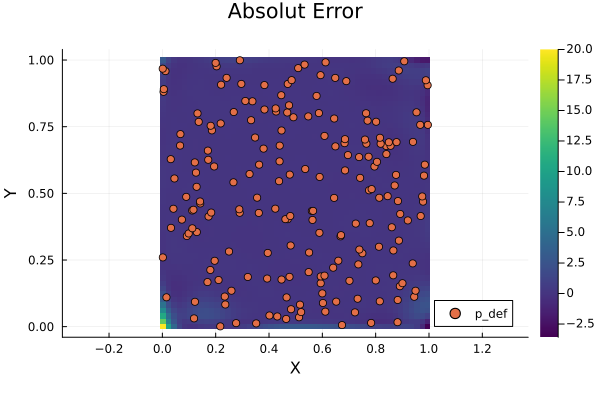

In [158]:
heatmap(xgrid, ygrid, error, aspect_ratio = :equal, color = :viridis, xlabel = "X", ylabel = "Y", title = "Absolut Error")
scatter!(points[1,:], points[2,:], marker = :circle, label="p_def")

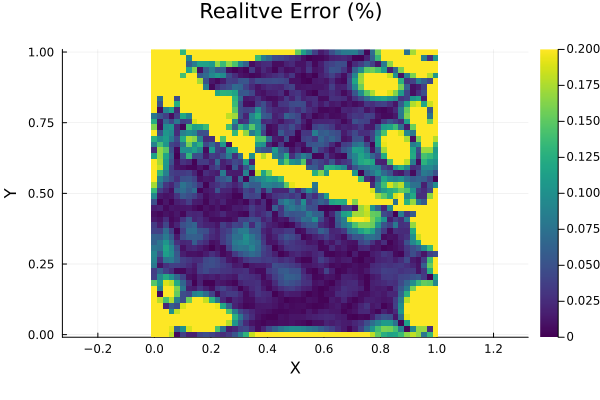

In [159]:
heatmap(xgrid, ygrid, relative_error, aspect_ratio = :equal, color = :viridis, xlabel = "X", ylabel = "Y", title = "Realitve Error (%) ", clims = (0,.20))
